## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display


## 讀入資料

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
#看遺失值的比率
miss_vals = df_train.isnull().sum()/len(df_train)
miss_vals.sort_values(ascending = False)
#轉換進_df_train中
missing_vals = pd.DataFrame(miss_vals,columns=['missing rate'])
missing_vals

,missing rate
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


## 觀察 Age

21205.17
14.526497332334044


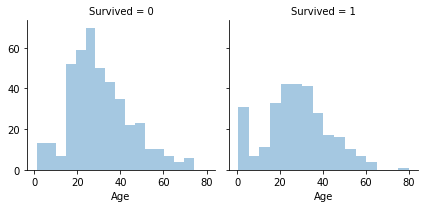

In [3]:
#step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性? 先敘述統計
print(df_train['Age'].sum())
print(df_train['Age'].std())
#連續型用分布圖形來看
g = sns.FacetGrid(df_train,col = 'Survived')
g.map(sns.distplot,'Age',kde = False)

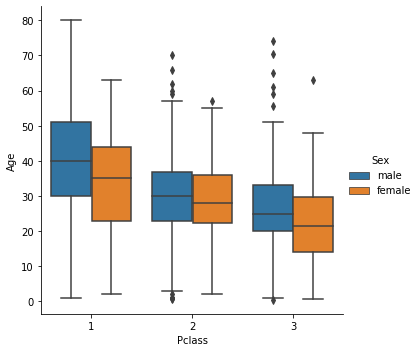

In [4]:
z = sns.catplot(x = 'Pclass',y = 'Age',hue = 'Sex',data = df_train,kind = 'box') #hue透過甚麼再多分出幾種顏色

In [5]:
from sklearn import preprocessing
import sklearn
print(sklearn.__version__)
#確認版本能夠使用KNNimputer，去package網站


0.24.2


In [8]:
'''我們試著用 Pclass和 Sex 來透過 KNN 來補值''' #先把性別、艙等轉換成零一變數
le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Pclass'] = le.fit_transform(df_train['Pclass'])
chosen_cols = df_train[['Age','Pclass','Sex']]
#設定多少個鄰近值來補植
neighbors = 1
from sklearn.impute import KNNImputer
#進行KNN的設定
imputer = KNNImputer(n_neighbors = neighbors)
#開始補植
chosen_cols_filled = pd.DataFrame(imputer.fit_transform(chosen_cols))
chosen_cols_filled

,0,1,2
0,22.0,2.0,1.0
1,38.0,0.0,0.0
2,26.0,2.0,0.0
3,35.0,0.0,0.0
4,35.0,2.0,1.0
5,22.0,2.0,1.0
6,54.0,0.0,1.0
7,2.0,2.0,1.0
8,27.0,2.0,0.0
9,14.0,1.0,0.0
